# Dataset Summary and Objective

## 1. Dataset Fields:
- **Name:** Patient's name (can be anonymized or excluded for modeling).
- **Age:** Patient's age.
- **Gender:** Patient's gender (male/female).
- **Blood Type:** Patient's blood type (e.g., A, B, AB, O).
- **Medical Condition:** Patient's medical issue (e.g., cancer, obesity, diabetes).
- **Date of Admission:** The date the patient was admitted to the hospital.
- **Doctor:** The attending doctor.
- **Hospital:** Hospital information.
- **Insurance Provider:** Patient's insurance company.
- **Billing Amount:** Total hospital expenses.
- **Room Number:** Hospital room number.
- **Admission Type:** Type of hospital admission (e.g., urgent, elective).
- **Discharge Date:** The date the patient was discharged.
- **Medication:** Prescribed medication.
- **Test Results:** Health test results (Normal, Inconclusive, Abnormal).

## 2. Project Objective:
- Build a classification model to predict test results (Normal, Inconclusive, Abnormal).
- Prioritize critical health cases by predicting health conditions early.
- Analyze the impact of insurance costs, medication, and admission type on test results.

## 3. Machine Learning Methods to Apply:
- **Logistic Regression:** A simple and explainable classification model.
- **Decision Trees:** To identify the most important features.
- **Support Vector Machines (SVM):** For learning complex classification boundaries.

## 4. Expected Outcomes:
- Develop a classification model to predict critical health conditions effectively.
- Improve the accuracy of test result predictions to support clinical decision-making.
- Provide insights to optimize medical costs and enhance healthcare outcomes.


# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import os
warnings.filterwarnings("ignore")


# Data Import

In [4]:
dataset = pd.read_csv("/content/healthcare_dataset.csv")
dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Data Preprocessing

## Basic Stats to Understand Data

In [5]:
dataset.shape

(27707, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27707 entries, 0 to 27706
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                27707 non-null  object 
 1   Age                 27707 non-null  int64  
 2   Gender              27707 non-null  object 
 3   Blood Type          27707 non-null  object 
 4   Medical Condition   27707 non-null  object 
 5   Date of Admission   27707 non-null  object 
 6   Doctor              27707 non-null  object 
 7   Hospital            27707 non-null  object 
 8   Insurance Provider  27707 non-null  object 
 9   Billing Amount      27707 non-null  float64
 10  Room Number         27707 non-null  int64  
 11  Admission Type      27707 non-null  object 
 12  Discharge Date      27707 non-null  object 
 13  Medication          27707 non-null  object 
 14  Test Results        27707 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 3.2

* Necessary steps to do:
    - Name column has to be prepared properly
    - Data of Admission & Discharge Date has to be converted to the Date Time type.

In [7]:
dataset.describe()

,Age,Billing Amount,Room Number
count,27707.000000,27707.000000,27707.000000
mean,51.655755,25611.364890,300.477894
std,19.584851,14192.812522,115.175867
min,18.000000,-1310.272895,101.000000
25%,35.000000,13329.331313,201.000000
50%,52.000000,25629.326758,302.000000
75%,69.000000,37875.345482,399.000000
max,85.000000,52271.663747,500.000000


### Name Column trasformation

In [8]:
def normalize_name(name):
    return ' '.join(word.capitalize() for word in name.split())

dataset['Name'] = dataset['Name'].apply(normalize_name)

# Check
dataset['Name'].head()

,Name
0,Bobby Jackson
1,Leslie Terry
2,Danny Smith
3,Andrew Watts
4,Adrienne Bell


### Type conversetion of Date related columns

In [9]:
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'])
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'])

#Check
for i in [dataset['Discharge Date'], dataset['Date of Admission']]:
    i.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27707 entries, 0 to 27706
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
27707 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 216.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 27707 entries, 0 to 27706
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
27707 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 216.6 KB


## Missing Value Check

In [10]:
dataset.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


* Clear, 😉

### Data Distribution Analysis

#### Age Feature

Text(0.5, 1.0, 'Age Distribution')

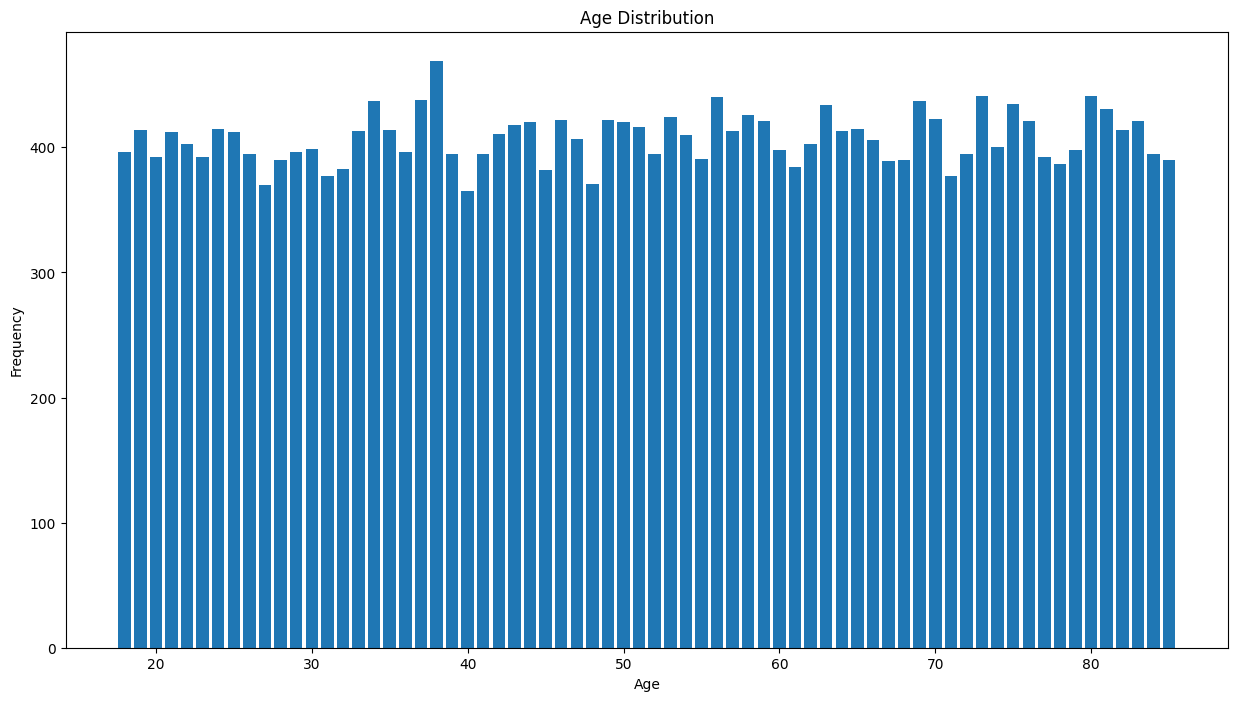

In [11]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Age'].value_counts().index, height = dataset['Age'].value_counts())
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title("Age Distribution")

#### Gender Feature

Text(0.5, 1.0, 'Gender Distribution')

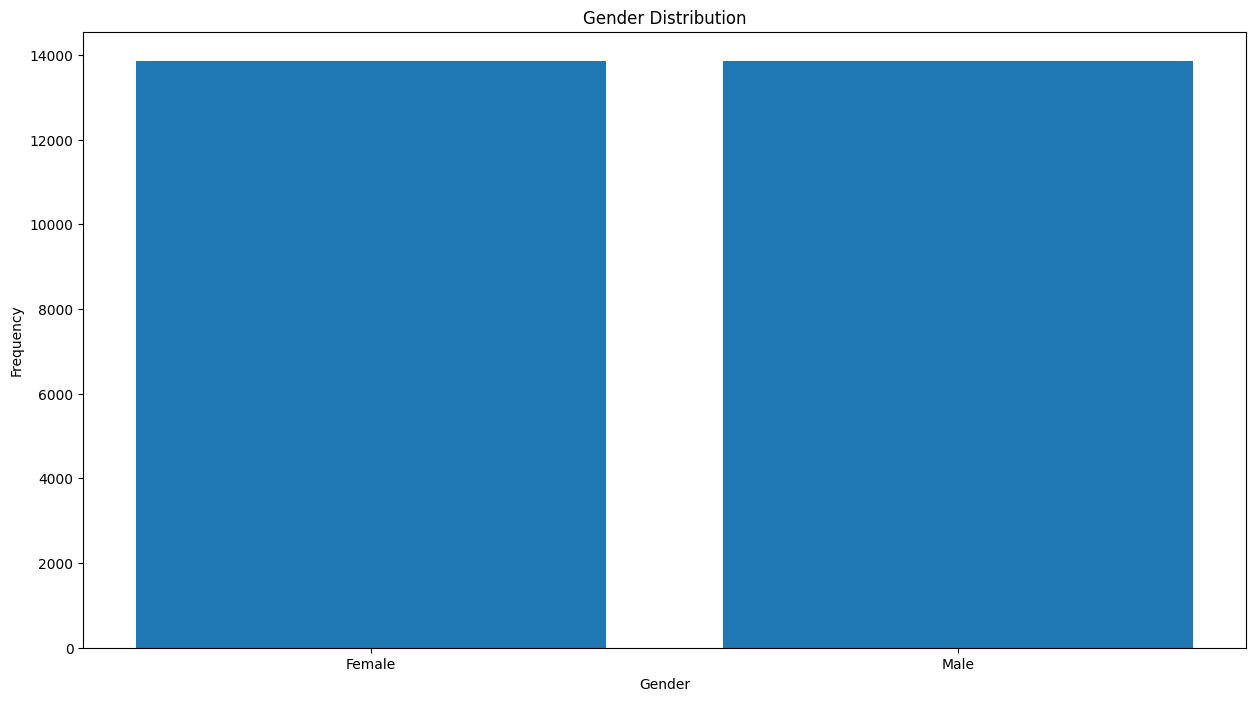

In [12]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Gender'].value_counts().index, height = dataset['Gender'].value_counts())
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title("Gender Distribution")

#### Blood Type

Text(0.5, 1.0, 'Blood Type Distribution')

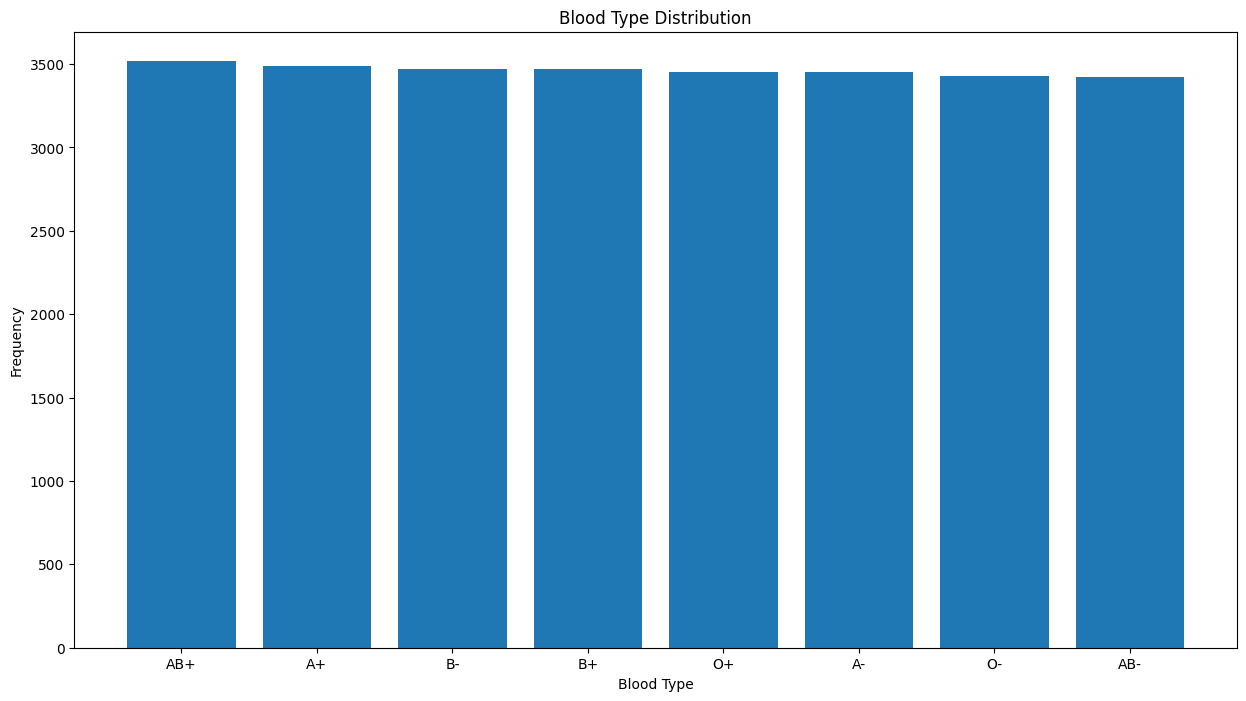

In [13]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Blood Type'].value_counts().index, height = dataset['Blood Type'].value_counts())
ax.set_xlabel('Blood Type')
ax.set_ylabel('Frequency')
ax.set_title("Blood Type Distribution")

#### Medical Condition

Text(0.5, 1.0, 'Medical Condition Distribution')

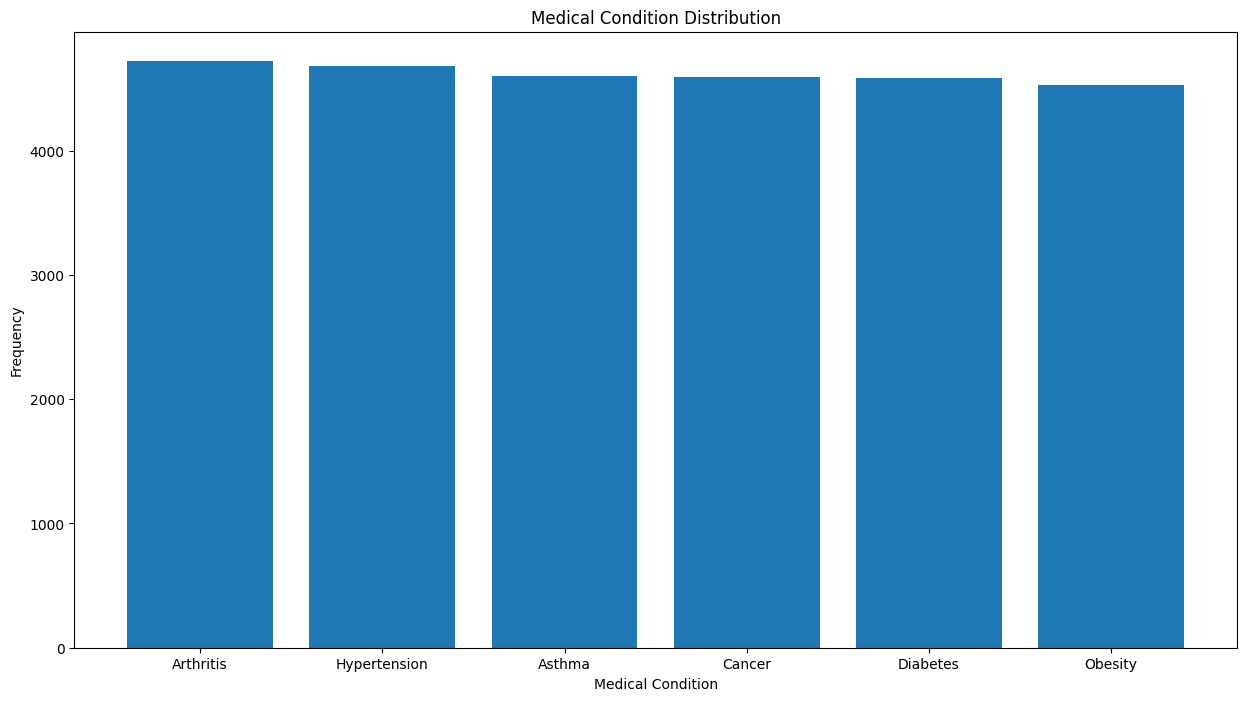

In [14]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medical Condition'].value_counts().index, height = dataset['Medical Condition'].value_counts())
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Frequency')
ax.set_title("Medical Condition Distribution")

#### Doctor Feature

In [15]:
len(dataset['Doctor'].unique())

24124

#### Hostpital Feature

In [16]:
len(dataset['Hospital'].unique())

23469

#### Insurance Provider Feature

Text(0.5, 1.0, 'Insurance Provider Distribution')

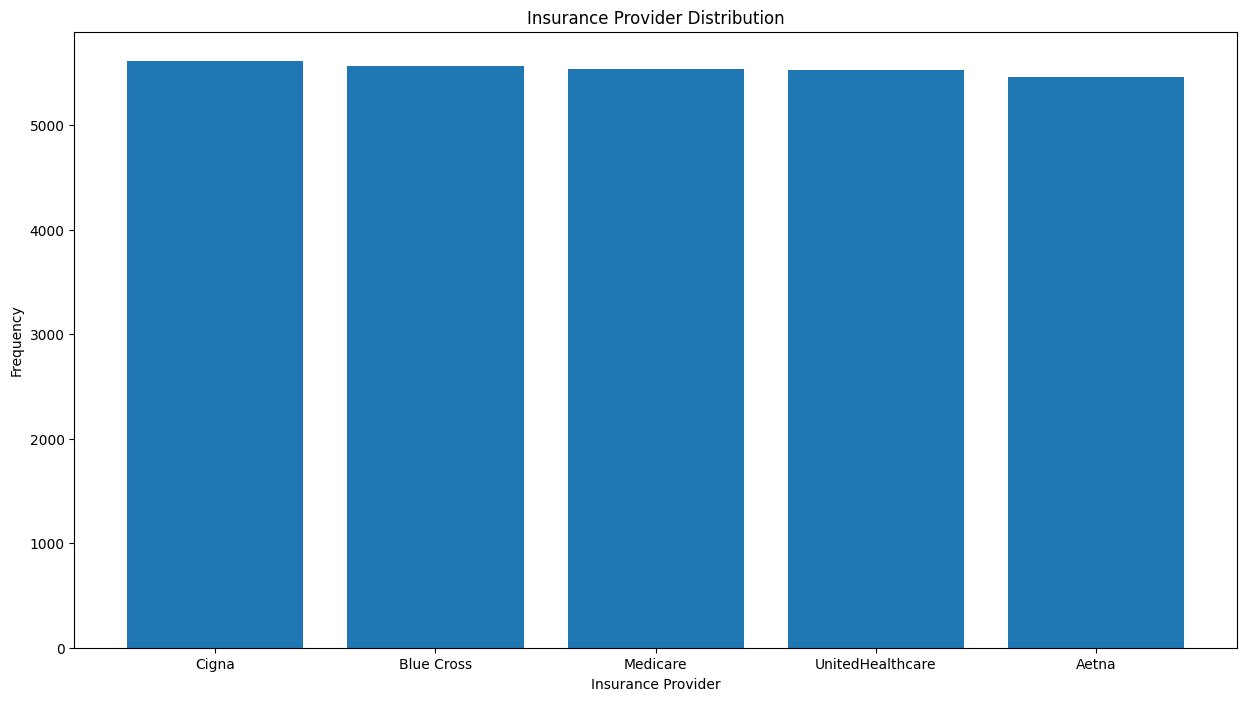

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Insurance Provider'].value_counts().index, height = dataset['Insurance Provider'].value_counts())
ax.set_xlabel('Insurance Provider')
ax.set_ylabel('Frequency')
ax.set_title("Insurance Provider Distribution")

#### Room Number Feature

In [18]:
len(dataset['Room Number'].unique())

400

#### Admission Type Feature

Text(0.5, 1.0, 'Admission Type Distribution')

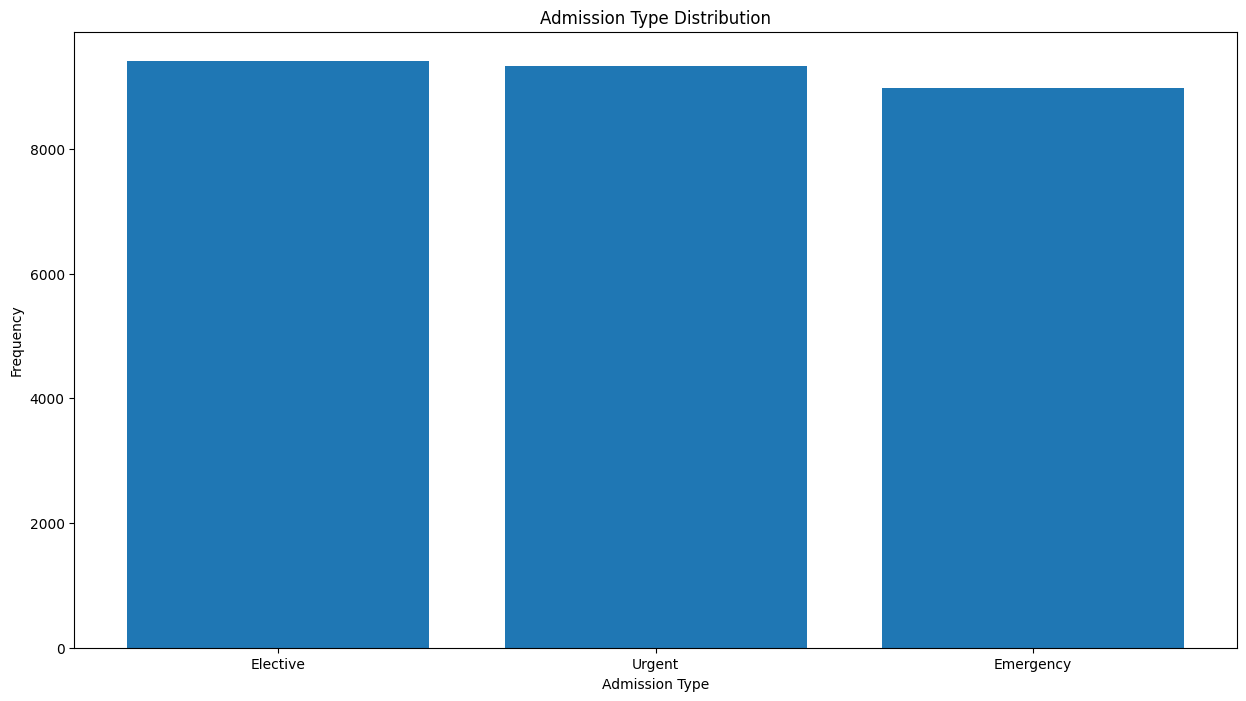

In [19]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Admission Type'].value_counts().index, height = dataset['Admission Type'].value_counts())
ax.set_xlabel('Admission Type')
ax.set_ylabel('Frequency')
ax.set_title("Admission Type Distribution")

#### Test Results Feature

Text(0.5, 1.0, 'Test Results Distribution')

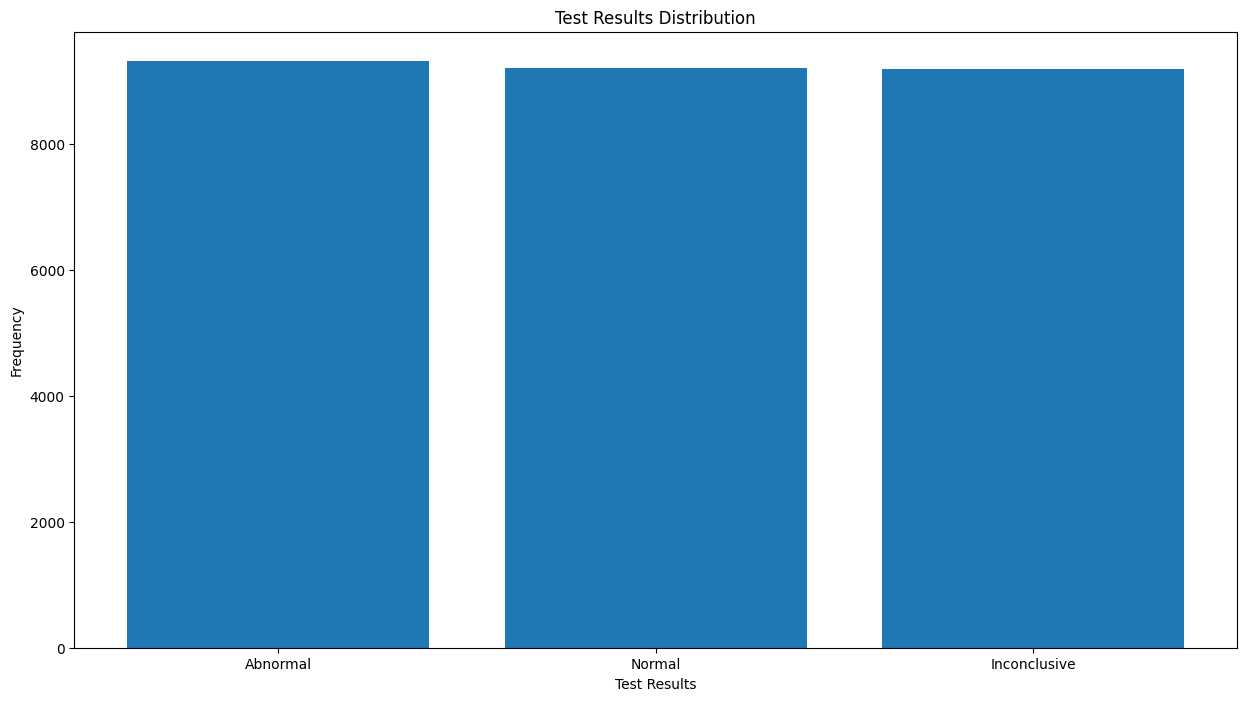

In [20]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Test Results'].value_counts().index, height = dataset['Test Results'].value_counts())
ax.set_xlabel('Test Results')
ax.set_ylabel('Frequency')
ax.set_title("Test Results Distribution")

#### Medication Feature

Text(0.5, 1.0, 'Medication Distribution')

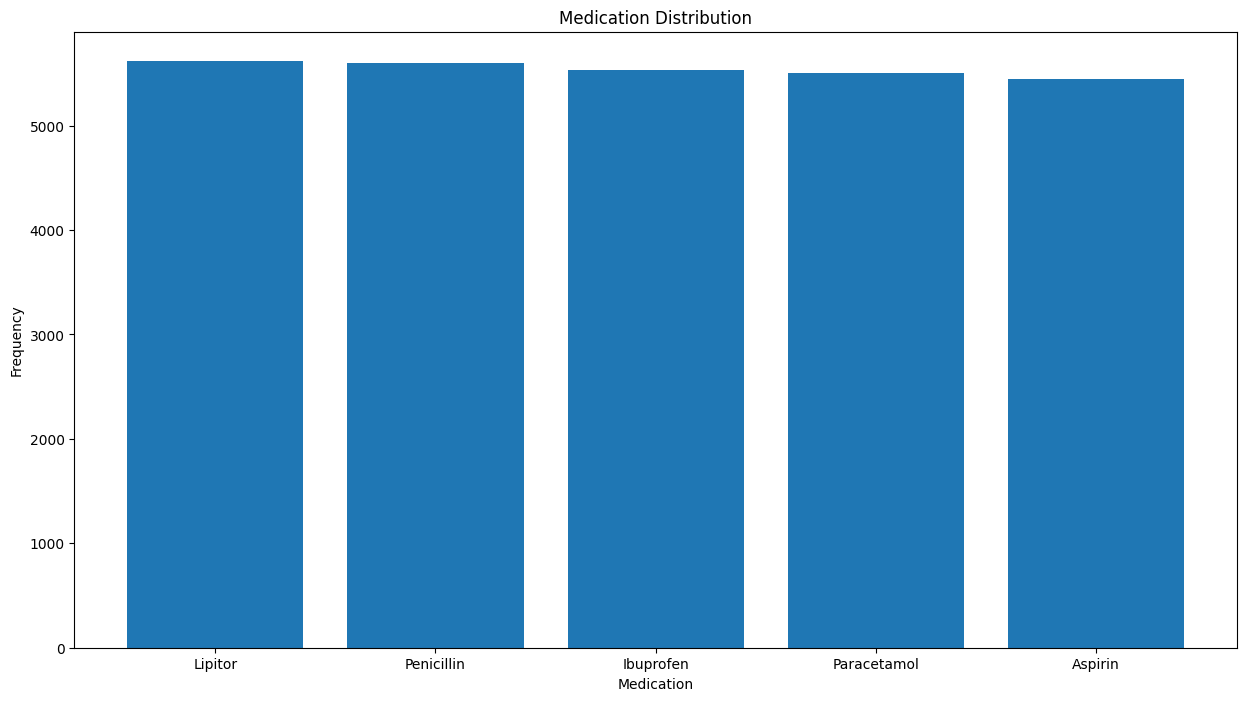

In [21]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medication'].value_counts().index, height = dataset['Medication'].value_counts())
ax.set_xlabel('Medication')
ax.set_ylabel('Frequency')
ax.set_title("Medication Distribution")

Text(0.5, 1.0, 'Distribution of Test Results in each Age Group')

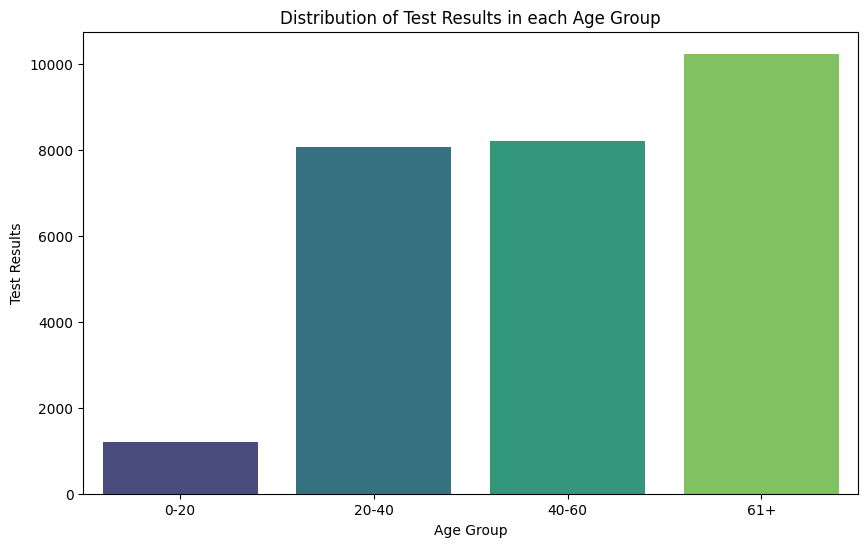

In [22]:
dataset['Age Group'] = pd.cut(dataset['Age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '20-40', '40-60', '61+'])
df = dataset.groupby('Age Group')['Test Results'].agg('count')

f, ax = plt.subplots(figsize=(10, 6))
#ax.bar(x=df.index, height=df)
sns.barplot(x=df.index, y=df, ax=ax, palette='viridis')
ax.set_title("Distribution of Test Results in each Age Group")

- Hastalık Türlerine Göre Ortalama Masraf Analizi:

    Tıbbi durumlara göre ortalama masraf değerlerini hesaplayıp görselleştirin.

In [23]:
dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group'],
      dtype='object')

Text(0.5, 1.0, 'Average Expense Analysis by Medical Sondition Types')

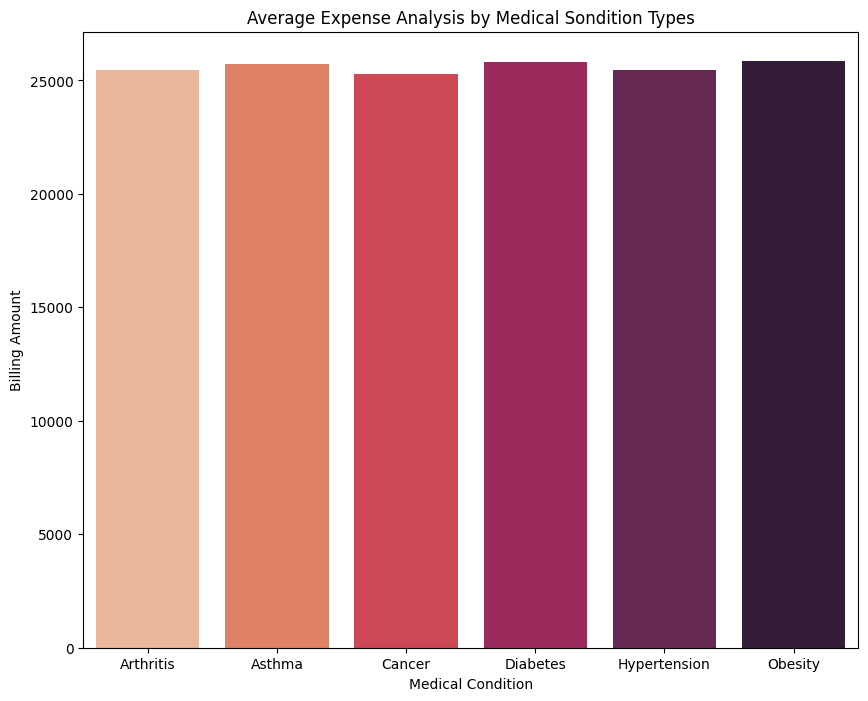

In [24]:
df = dataset.groupby('Medical Condition')['Billing Amount'].mean()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df.index, y=df, ax=ax, palette='rocket_r')
ax.set_title("Average Expense Analysis by Medical Sondition Types")

- Aylık Hasta Kabul Analizi:

    Giriş tarihlerinden ay bilgisi çıkarılarak aylık hasta kabul yoğunluğunu analiz edin.

Text(0.5, 1.0, 'Number of Patient per Month')

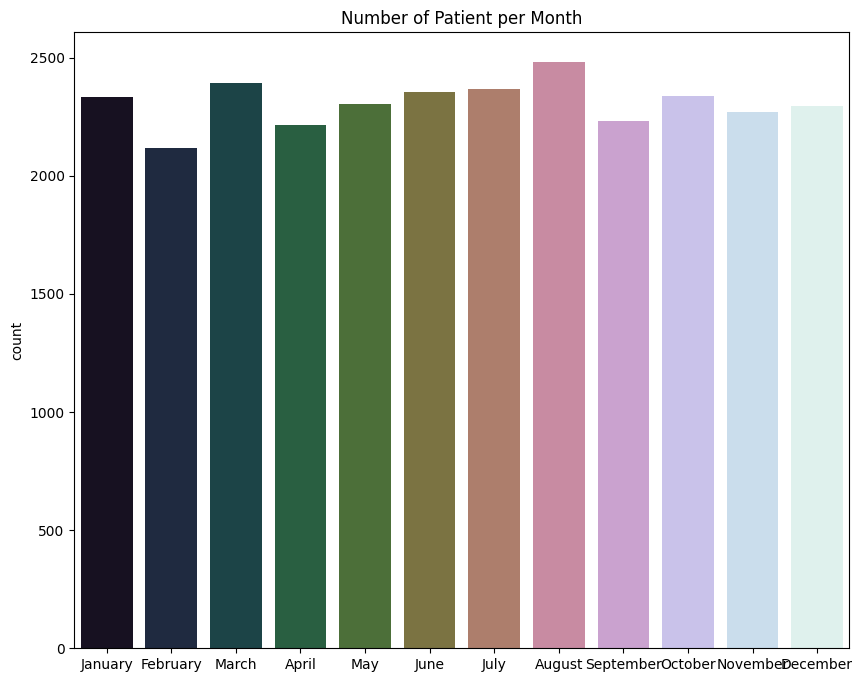

In [25]:
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dataset['Month']=pd.to_datetime(dataset['Date of Admission']).dt.month
monthly_counts = dataset['Month'].value_counts().sort_index()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=months, y=monthly_counts, ax=ax, palette='cubehelix')
ax.set_title("Number of Patient per Month")

- Sigorta Sağlayıcılarına Göre Billing Amount Dağılımı:

    Sigorta şirketlerine göre farklı Billing Amount dağılımını gruplandırın.

<Axes: xlabel='Insurance Provider', ylabel='Billing Amount'>

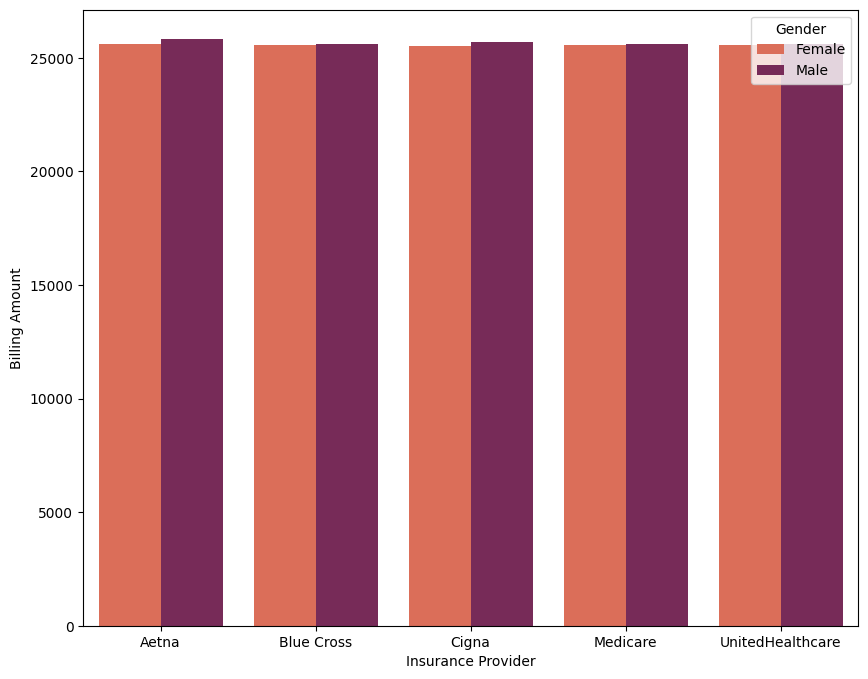

In [26]:
df = dataset.groupby(['Insurance Provider', 'Gender'])['Billing Amount'].mean().reset_index().sort_values(['Insurance Provider', 'Gender'])

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Insurance Provider', y='Billing Amount', hue='Gender', data=df, ax=ax, palette="rocket_r")

- Kabul Türüne Göre Hastanede Kalış Süresi Analizi:

    Taburcu ve giriş tarihlerini kullanarak kalış süresini hesaplayın ve giriş türüne göre ortalamalarını karşılaştırın.

In [27]:
dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Analysis of Length of Stay by Admission Type')

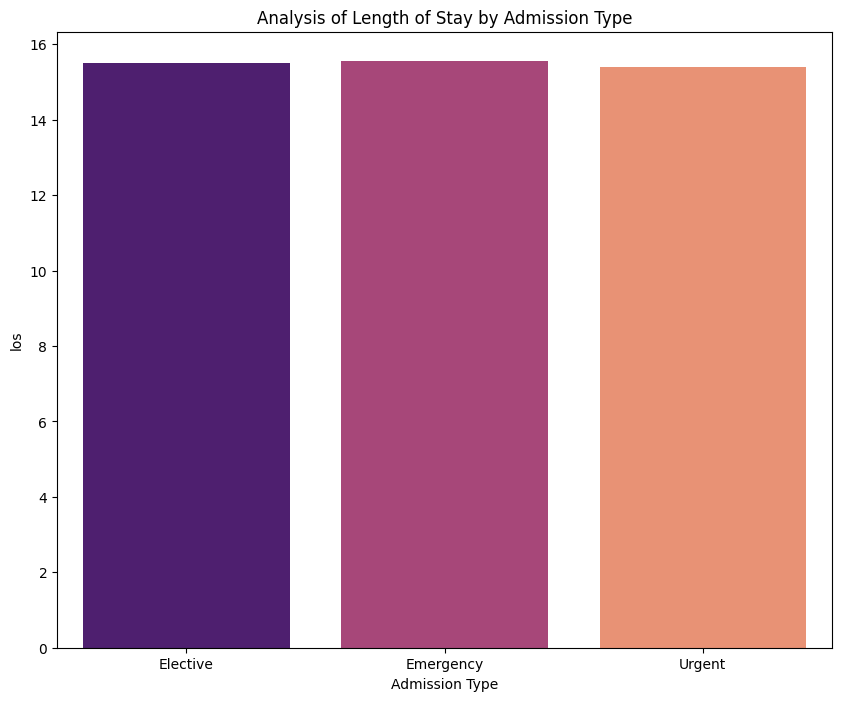

In [28]:
dataset['los'] = np.subtract(dataset['Discharge Date'], dataset['Date of Admission']).dt.days

df = dataset.groupby(['Admission Type'])['los'].agg('mean').reset_index().sort_values('Admission Type')

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=df,
    x='Admission Type',
    y='los',
    ax=ax,
    palette="magma"
)
ax.set_title("Analysis of Length of Stay by Admission Type")

- Korelasyon Analizi:

    Özellikler arasındaki korelasyonu analiz ederek anlamlı ilişkileri belirleyin.

In [29]:
dataset=dataset.drop(['Age Group', 'Month', 'los'], axis=1)

<Axes: >

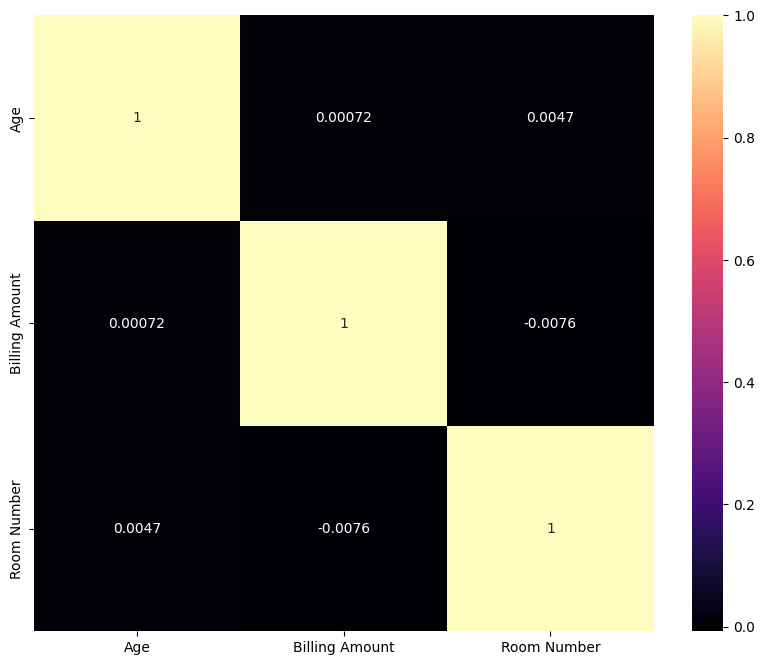

In [30]:
feature_corr = dataset.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=feature_corr, annot=True, cmap="magma")

- Kan Gruplarına Göre Masraf Dağılımı:

    Kan gruplarına göre toplam veya ortalama masrafı analiz edin.

Text(0.5, 1.0, 'Analysis of Blood Type by Billing Amount')

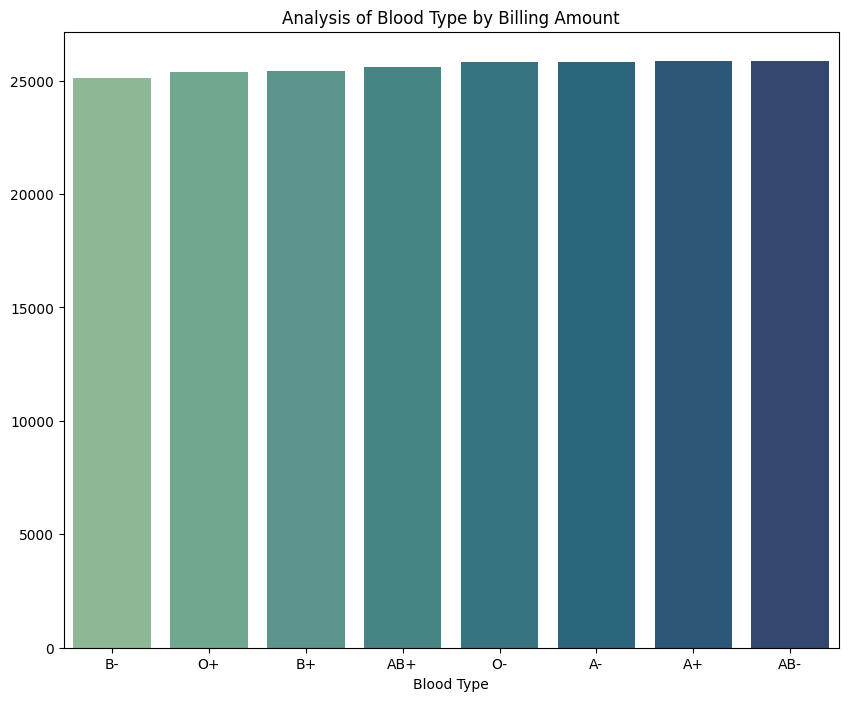

In [31]:
df = dataset.groupby(['Blood Type'])['Billing Amount'].agg('mean').sort_values(ascending=True)

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df.index, y=df.values, ax=ax, palette='crest')
ax.set_title("Analysis of Blood Type by Billing Amount")

* Billing Amount Accordig to the Blood Type per Gender

Text(0.5, 1.0, 'Billing Amount Accordig to the Blood Type per Gender')

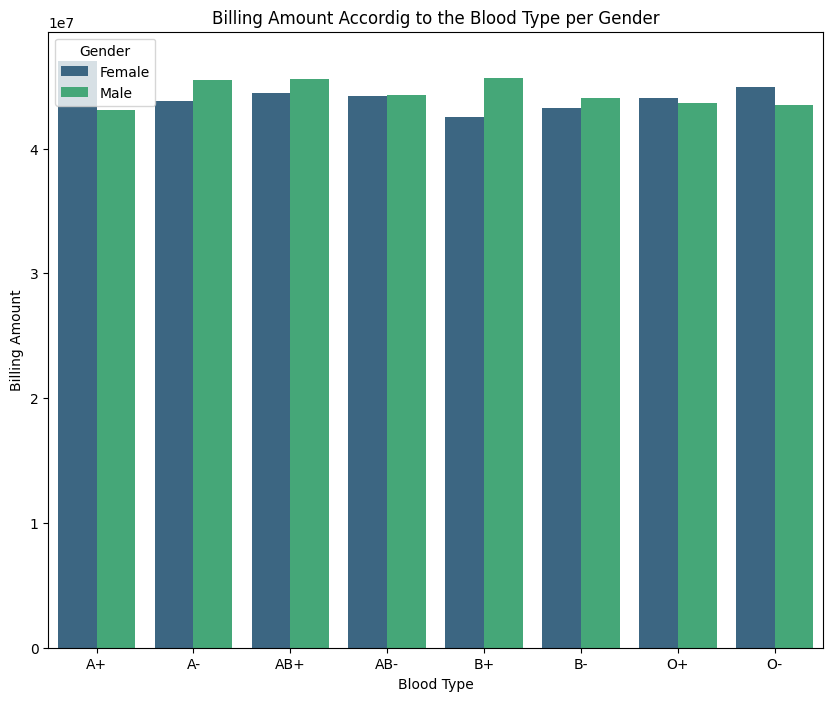

In [32]:
df = dataset.groupby(['Gender', 'Blood Type'])['Billing Amount'].agg('sum').reset_index().sort_values('Blood Type')

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='Blood Type', y='Billing Amount', hue='Gender', ax=ax, palette='viridis')
ax.set_title("Billing Amount Accordig to the Blood Type per Gender")

# Feature Engineering

* Creating a new field `Admission Duration`:
    - Instead of entrance and exit dates of patient, we can calculate Admissin Duration depending on these dates. After with that calculation, we will not need for `Date Of Admission`, `Discharge Date`, `Name`, `Doctor`, `Hospital` columns so, we can drop them. With this operation we can reduce operation cost.

In [33]:
dataset['Admission Duration'] = (dataset['Discharge Date'] - dataset['Date of Admission']).dt.days
dataset.drop(['Name', 'Doctor', 'Date of Admission', 'Discharge Date', 'Hospital', 'Room Number'], axis=1, inplace=True)

* Next we need to also convert categorical features into numerical.

In [34]:
dataset.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',
       'Test Results', 'Admission Duration'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Blood Type'] = label_encoder.fit_transform(dataset['Blood Type'])
dataset['Medical Condition'] = label_encoder.fit_transform(dataset['Medical Condition'])
dataset['Insurance Provider'] = label_encoder.fit_transform(dataset['Insurance Provider'])
dataset['Admission Type'] = label_encoder.fit_transform(dataset['Admission Type'])
dataset['Medication'] = label_encoder.fit_transform(dataset['Medication'])
dataset['Test Results'] = label_encoder.fit_transform(dataset['Test Results'])

In [36]:
#dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})
#dataset['Test Results'] = dataset['Test Results'].map({'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2})

In [37]:
# dataset = pd.get_dummies(
    # dataset,
    # columns=[
        # 'Gender',
        # 'Medication',
        # 'Blood Type',
        # 'Admission Type',
        # 'Medical Condition',
        # 'Insurance Provider'
    # ],
    # drop_first=True
# )

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Age', 'Billing Amount', 'Admission Duration']] = scaler.fit_transform(dataset[['Age', 'Billing Amount', 'Admission Duration']])
dataset.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admission Duration
0,-1.105760,1,5,2,1,-0.475960,2,3,2,-1.561911
1,0.528185,1,0,5,3,0.565928,1,1,1,-1.098717
2,1.243036,0,1,5,0,0.165138,1,0,2,-0.056530
3,-1.207882,0,6,3,3,0.866540,0,1,0,1.680447
4,-0.441970,0,2,2,0,-0.801339,2,4,0,0.522462


# Modeling

## Base Model: Logistic Regression

* Train - Test Split

In [39]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['Test Results'])
y = dataset['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20780, 9)
(6927, 9)
(20780,)
(6927,)


<BarContainer object of 9 artists>

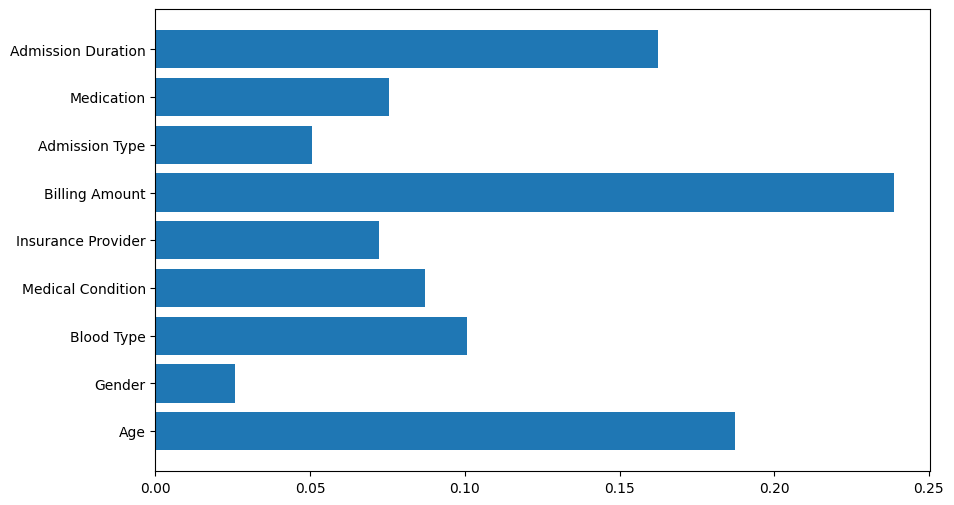

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Önem derecesini görselleştirin
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)

* `Base Model = Logistic Regression`

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_logreg = log_reg.predict(X_test)

score_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)
print(classification_report_logreg)
print("------------------------------------------")
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

              precision    recall  f1-score   support

           0       0.35      0.26      0.30      2376
           1       0.33      0.37      0.35      2267
           2       0.34      0.38      0.36      2284

    accuracy                           0.34      6927
   macro avg       0.34      0.34      0.34      6927
weighted avg       0.34      0.34      0.33      6927

------------------------------------------
[[622 882 872]
 [567 835 865]
 [592 814 878]]


* According to the report and confusion matrix, we can clearly say that model is working to predict randomly so, ``accuracy is %34``. For a base model, it's too poor.
* Also this consequence can be seen from confusion matrix, many instance of class have been classified wrong.
* The reason why the model is so low that it's because of linear model structure, because our target variable descleares 3 kinds of class.

## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

classification_report_rfc = classification_report(y_test, y_pred_rf)
print(classification_report_rfc)
print("_----------------------------------_")
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rfc)
print("_----------------------------------_")
score_rfc = rnd_clf.score(X_test, y_test)
print(score_rfc)

              precision    recall  f1-score   support

           0       0.34      0.31      0.33      2376
           1       0.32      0.34      0.33      2267
           2       0.34      0.35      0.34      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

_----------------------------------_
[[747 837 792]
 [733 764 770]
 [731 764 789]]
_----------------------------------_
0.33203406958279197


### Hyperparameter Tuning for RFC

In [44]:
best_rf_model_file = os.path.join('../Models', 'best_rf_model.pkl')

if os.path.exists(best_rf_model_file):
    best_rf_model = joblib.load(best_rf_model_file)
else:
    print("Training has been started...")
    rnd_clf = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],        # Ağaç sayısı
        'max_depth': [None, 10, 20, 30],       # Maksimum derinlik
        'min_samples_split': [2, 5, 10],       # Düğümlerin bölünmesi için minimum örnek sayısı
        'min_samples_leaf': [1, 2, 4],          # Yaprak düğümdeki minimum örnek sayısı
        'bootstrap': [True, False]
    }

    grid_search = GridSearchCV(estimator=rnd_clf,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               verbose=2,
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)

    #Saving the best model
    best_rf_model = grid_search.best_estimator_
    #joblib.dump(best_rf_model, best_rf_model_file)
    print("Best model has been saved.")

# En iyi parametreler ve skor
if 'grid_search' in locals():
    print("Best parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

y_pred_rfc_tuned = best_rf_model.predict(X_test)

# Model Performance Evaluation
score_rfc_tuned = accuracy_score(y_test, y_pred_rfc_tuned)
print("Test Seti Doğruluğu:", score_rfc_tuned)
print("Classification Report:")
classification_report_rfc_tuned = classification_report(y_test, y_pred_rfc_tuned)
print(classification_report_rfc_tuned)
print("Confusion Matrix:")
confusion_matrix_rfc_tuned = confusion_matrix(y_test, y_pred_rfc_tuned)
print(confusion_matrix_rfc_tuned)

Training has been started...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best model has been saved.
Best parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.34095283926852743
Test Seti Doğruluğu: 0.3271257398585246
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.34      2376
           1       0.32      0.33      0.33      2267
           2       0.32      0.32      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

Confusion Matrix:
[[790 807 779]
 [749 753 765]
 [783 778 723]]


## SVM with RBF

* Data is non-linear so, RBF is neceessary.

In [45]:
from sklearn.svm import SVC

# SVM modeli RBF kernel ile oluşturma ve eğitme
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Tahminler yapma
y_pred_svm = svm_rbf.predict(X_test)

# Model performansını değerlendirme
classification_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(classification_report_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      2376
           1       0.33      0.33      0.33      2267
           2       0.33      0.30      0.31      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

Confusion Matrix:
[[884 802 690]
 [853 741 673]
 [881 727 676]]


### Hyperparameter Tuning for SVM

In [46]:
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # RBF kernel için gamma
    'kernel': ['rbf']               # Sadece RBF kernel
}

best_svm_model_file = os.path.join('../Models', 'best_svm_model.pkl')

#Model Check
if os.path.exists(best_svm_model_file):
    best_svm_model = joblib.load(best_svm_model_file)
else:
    print("Training has started...")
    grid = GridSearchCV(
        SVC(random_state=42),
        param_grid,
        refit=True,
        verbose=2,
        cv=3
    )
    grid.fit(X_train, y_train)

    #Saving the best model
    best_svm_model = grid.best_estimator_
    #joblib.dump(best_svm_model, best_svm_model_file)

if 'grid' in locals():
    print("Best Parameters:", grid.best_params_)
    print("Best Cross-Validation Score:", grid.best_score_)

# Test seti üzerinde tahminler yapma
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Model performansını değerlendirme
score_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
classification_report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)
print("Classification Report:")
print(classification_report_svm_tuned)
confusion_matrix_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
print("Confusion Matrix:")
print(confusion_matrix_svm_tuned)

Training has started...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  13.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  13.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  13.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  13.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  13.5s
[CV] END ...............

In [47]:
# En iyi parametreleri ve en iyi skoru yazdırma
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.3366220056824325


In [48]:
# Model performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.39      0.37      2376
           1       0.35      0.33      0.34      2267
           2       0.34      0.33      0.33      2284

    accuracy                           0.35      6927
   macro avg       0.35      0.35      0.35      6927
weighted avg       0.35      0.35      0.35      6927

Confusion Matrix:
[[929 705 742]
 [825 740 702]
 [881 658 745]]


## XGBoost

In [49]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

score_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: ", score_xgb)
print("---------------------------------------")
classification_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report: ")
print(classification_report_xgb)
print("---------------------------------------")
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix: ")
print(confusion_matrix_xgb)

Accuracy:  0.3336220586112314
---------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.35      0.36      0.35      2376
           1       0.33      0.33      0.33      2267
           2       0.32      0.32      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

---------------------------------------
Confusion Matrix: 
[[846 750 780]
 [756 743 768]
 [829 733 722]]


### Hyperparameter Tuning:

In [50]:
#best_xgb_model_file = os.path.join('../Models', 'best_xgb_model.pkl')

#Model Check
#if os.path.exists(best_xgb_model_file):
#    best_xgb_model = joblib.load(best_xgb_model_file)
#else:
    #print("Training has started...")

param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    # Grid Search Time
grid_search = GridSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=2,
        n_jobs=-1
    )
grid_search.fit(X_train, y_train)

    #Saving the best model
best_xgb_model = grid_search.best_estimator_
    #joblib.dump(best_xgb_model, best_xgb_model_file)

#if 'grid_search' in locals():
    #print("Best Parameters:", grid_search.best_params_)
    #print("Best Cross-Validation Score:", grid_search.best_score_)

# Test seti üzerinde tahminler yapma
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Model performansını değerlendirme
score_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print("Classification Report:")
print("-----------------------------------------")
classification_report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
print(classification_report_xgb_tuned)
print("-----------------------------------------")
print("Confusion Matrix:")
print("-----------------------------------------")
confusion_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
print(confusion_matrix_xgb_tuned)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Classification Report:
-----------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.36      0.35      2376
           1       0.32      0.32      0.32      2267
           2       0.33      0.31      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

-----------------------------------------
Confusion Matrix:
-----------------------------------------
[[848 811 717]
 [805 733 729]
 [853 712 719]]


# Metric Visualization

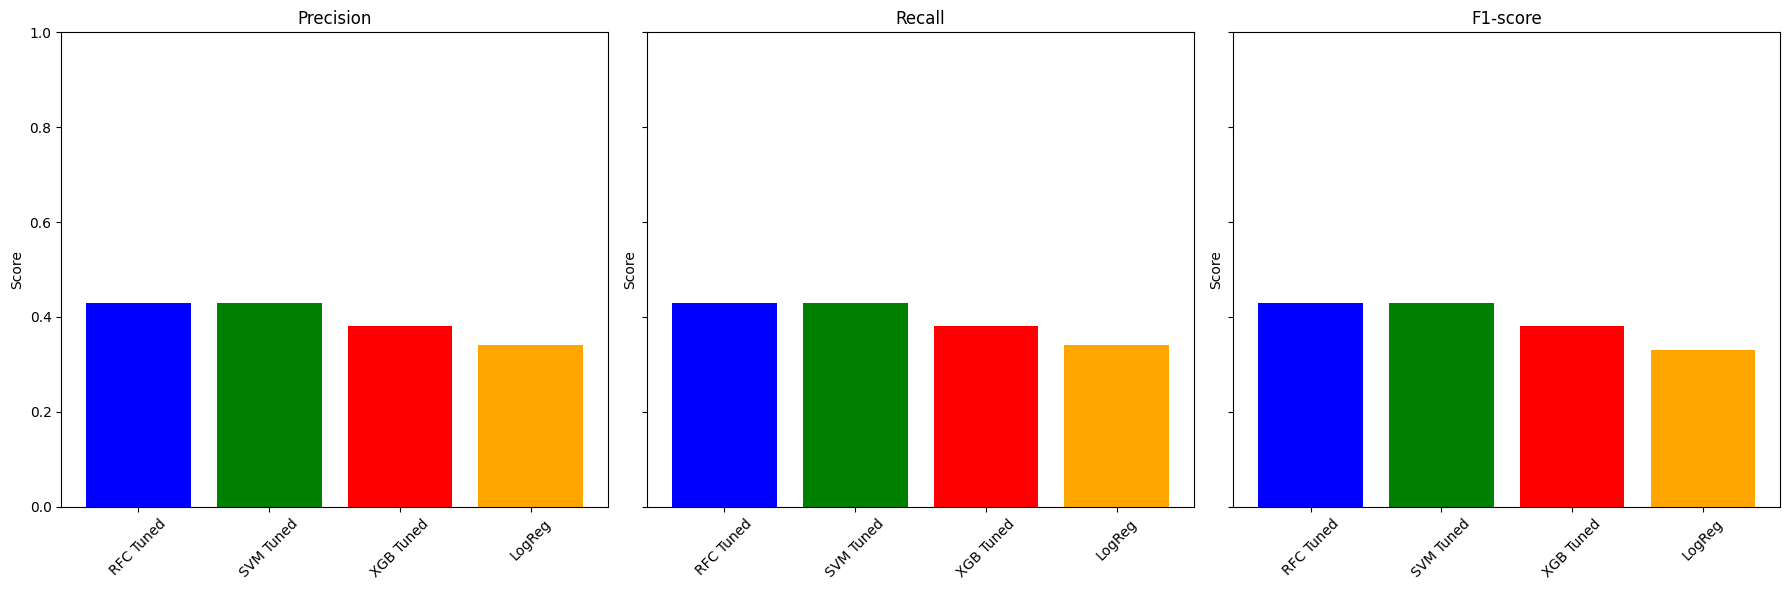

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Classification report string'lerini tanımlama
classification_report_rfc_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.43      0.43      4714\n           1       0.42      0.43      0.43      4509\n           2       0.43      0.43      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_svm_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.45      0.44      4714\n           1       0.42      0.41      0.42      4509\n           2       0.43      0.42      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_xgb_tuned = '              precision    recall  f1-score   support\n\n           0       0.39      0.40      0.39      4714\n           1       0.38      0.39      0.38      4509\n           2       0.38      0.37      0.38      4652\n\n    accuracy                           0.38     13875\n   macro avg       0.38      0.38      0.38     13875\nweighted avg       0.38      0.38      0.38     13875\n'

classification_report_logreg = '              precision    recall  f1-score   support\n\n           0       0.34      0.28      0.31      4714\n           1       0.32      0.37      0.34      4509\n           2       0.34      0.36      0.35      4652\n\n    accuracy                           0.34     13875\n   macro avg       0.34      0.34      0.33     13875\nweighted avg       0.34      0.34      0.33     13875\n'

# Raporları bir dictionary olarak saklayalım
classification_reports = {
    "RFC Tuned": classification_report_rfc_tuned,
    "SVM Tuned": classification_report_svm_tuned,
    "XGB Tuned": classification_report_xgb_tuned,
    "LogReg": classification_report_logreg
}

# Her raporu işleyerek anlamlı bir yapıya dönüştürme
processed_reports = {}
for algo_name, report_text in classification_reports.items():
    # Metin raporunu DataFrame'e dönüştür
    df = pd.read_fwf(StringIO(report_text), skiprows=1)
    df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']

    # Sadece "macro avg" satırını çekiyoruz
    macro_avg_row = df[df['class'] == 'macro avg']
    processed_reports[algo_name] = macro_avg_row[['precision', 'recall', 'f1-score']].iloc[0]

# Görselleştirme için hazır veri oluşturma
algorithms = list(processed_reports.keys())
metrics = ['precision', 'recall', 'f1-score']
data = {metric: [processed_reports[algo][metric] for algo in algorithms] for metric in metrics}

# Subplotları oluşturma
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), sharey=True)

colors = ['blue', 'green', 'red', 'orange']  # Her algoritma için bir renk

for i, metric in enumerate(metrics):
    axes[i].bar(algorithms, data[metric], color=colors)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0, 1)  # Skor aralığı
    axes[i].set_xticks(range(len(algorithms)))
    axes[i].set_xticklabels(algorithms, rotation=45)

plt.tight_layout()

In [52]:
score_rfc_tuned

0.3271257398585246

In [53]:
score_xgb_tuned

0.33203406958279197

In [54]:
score_svm_tuned

0.34849141042298254

In [55]:
score_logreg

0.3370867619460084

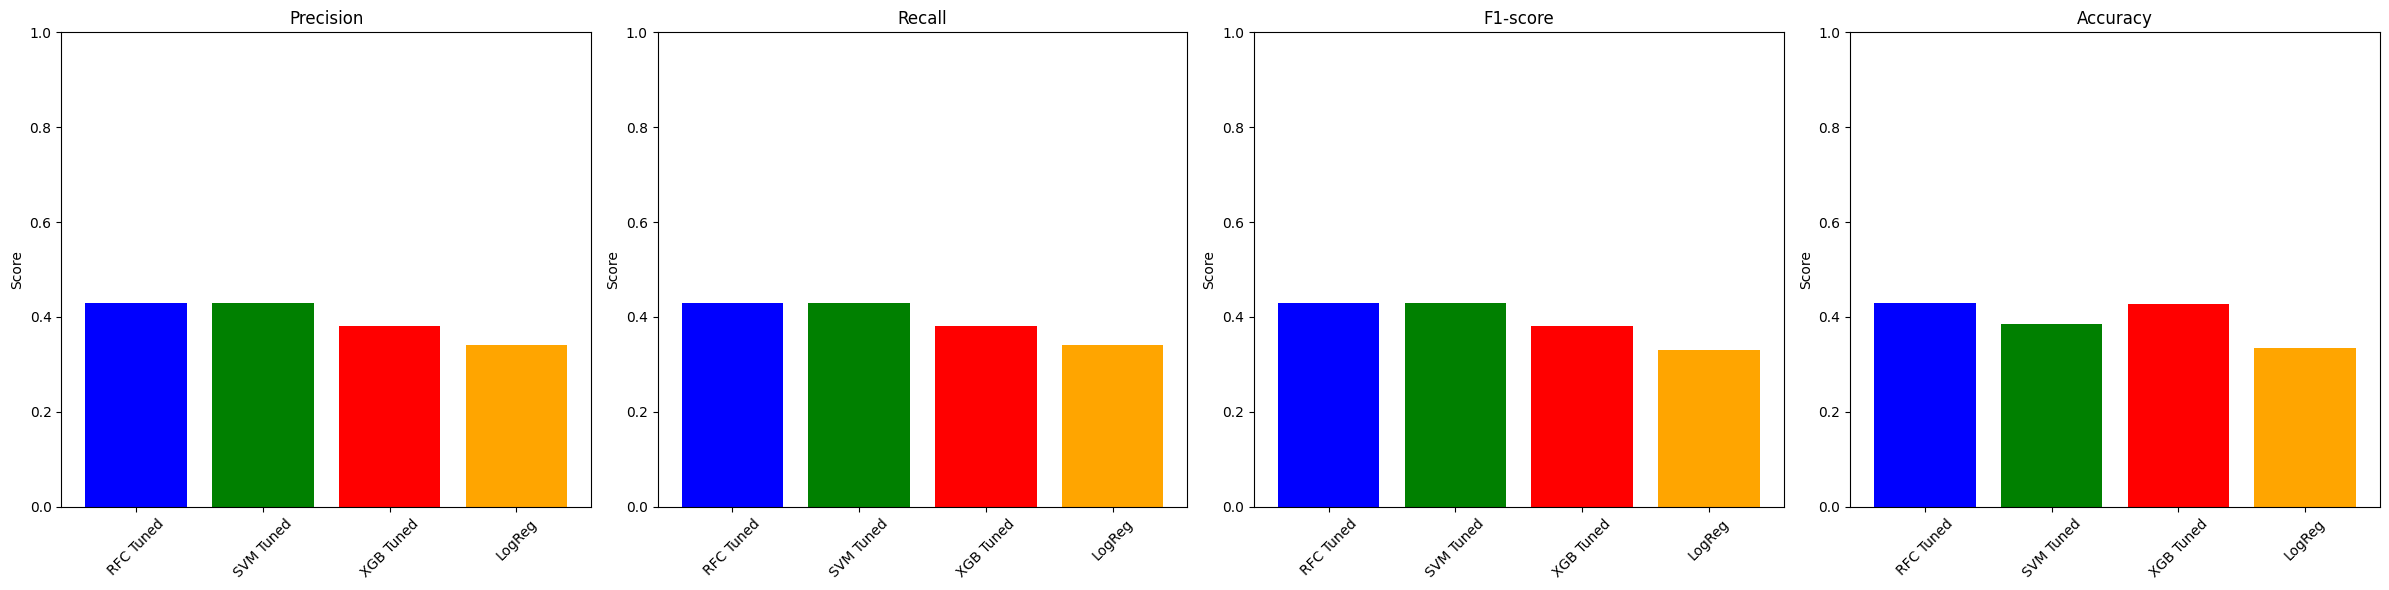

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Classification report string'lerini tanımlama
classification_report_rfc_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.43      0.43      4714\n           1       0.42      0.43      0.43      4509\n           2       0.43      0.43      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_svm_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.45      0.44      4714\n           1       0.42      0.41      0.42      4509\n           2       0.43      0.42      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_xgb_tuned = '              precision    recall  f1-score   support\n\n           0       0.39      0.40      0.39      4714\n           1       0.38      0.39      0.38      4509\n           2       0.38      0.37      0.38      4652\n\n    accuracy                           0.38     13875\n   macro avg       0.38      0.38      0.38     13875\nweighted avg       0.38      0.38      0.38     13875\n'

classification_report_logreg = '              precision    recall  f1-score   support\n\n           0       0.34      0.28      0.31      4714\n           1       0.32      0.37      0.34      4509\n           2       0.34      0.36      0.35      4652\n\n    accuracy                           0.34     13875\n   macro avg       0.34      0.34      0.33     13875\nweighted avg       0.34      0.34      0.33     13875\n'

# Raporları bir dictionary olarak saklayalım
classification_reports = {
    "RFC Tuned": classification_report_rfc_tuned,
    "SVM Tuned": classification_report_svm_tuned,
    "XGB Tuned": classification_report_xgb_tuned,
    "LogReg": classification_report_logreg
}

# Her raporu işleyerek anlamlı bir yapıya dönüştürme
processed_reports = {}
for algo_name, report_text in classification_reports.items():
    df = pd.read_fwf(StringIO(report_text), skiprows=1)
    df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    macro_avg_row = df[df['class'] == 'macro avg']
    processed_reports[algo_name] = macro_avg_row[['precision', 'recall', 'f1-score']].iloc[0]

# Ek olarak accuracy skorlarını tanımlama
accuracy_scores = {
    "RFC Tuned": 0.42897297297297273,
    "XGB Tuned": 0.3842162162162162,
    "SVM Tuned": 0.428036036036036,
    "LogReg": 0.3354954954954955
}

# Görselleştirme için veri hazırlama
algorithms = list(processed_reports.keys())
metrics = ['precision', 'recall', 'f1-score']
data = {metric: [processed_reports[algo][metric] for algo in algorithms] for metric in metrics}

# Subplotları oluşturma (4 grafik: precision, recall, f1-score ve accuracy)
fig, axes = plt.subplots(1, len(metrics) + 1, figsize=(24, 6), sharey=False)

colors = ['blue', 'green', 'red', 'orange']  # Her algoritma için renk

# İlk 3 grafiği çizme (precision, recall, f1-score)
for i, metric in enumerate(metrics):
    axes[i].bar(algorithms, data[metric], color=colors)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0, 1)
    axes[i].set_xticks(range(len(algorithms)))
    axes[i].set_xticklabels(algorithms, rotation=45)

# 4. grafik olarak accuracy grafiğini ekleme
axes[3].bar(algorithms, list(accuracy_scores.values()), color=colors)
axes[3].set_title("Accuracy")
axes[3].set_ylabel('Score')
axes[3].set_ylim(0, 1)
axes[3].set_xticks(range(len(algorithms)))
axes[3].set_xticklabels(algorithms, rotation=45)

plt.tight_layout()

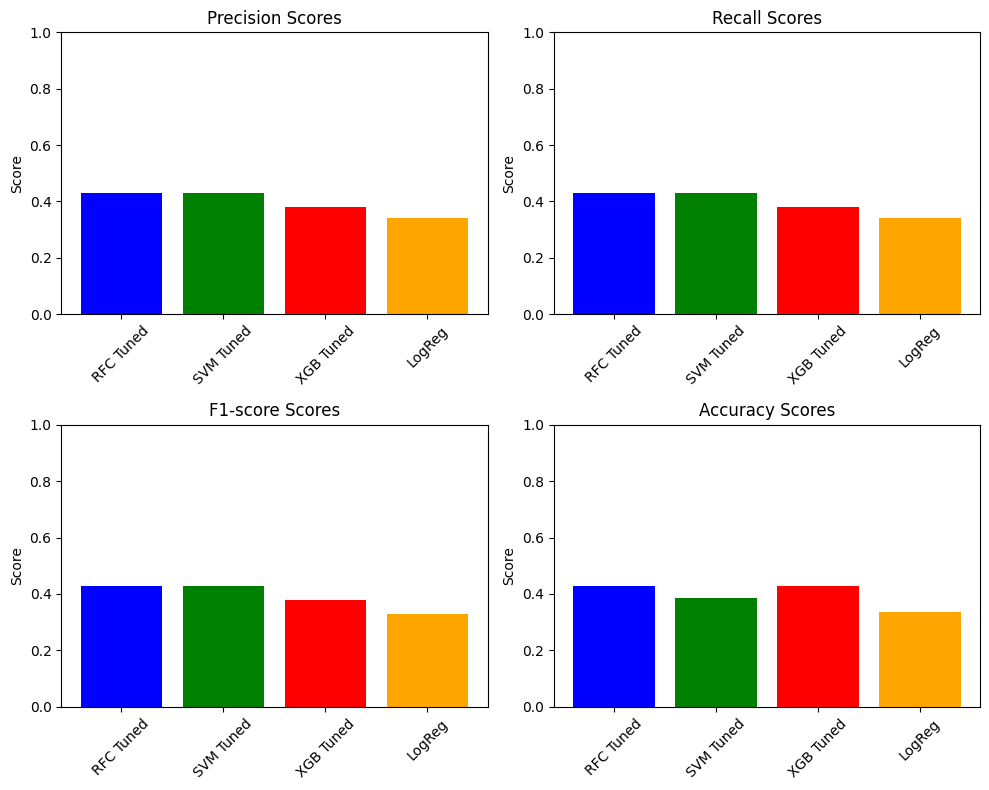

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Classification report string'lerini tanımlama
classification_report_rfc_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.43      0.43      4714\n           1       0.42      0.43      0.43      4509\n           2       0.43      0.43      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_svm_tuned = '              precision    recall  f1-score   support\n\n           0       0.43      0.45      0.44      4714\n           1       0.42      0.41      0.42      4509\n           2       0.43      0.42      0.43      4652\n\n    accuracy                           0.43     13875\n   macro avg       0.43      0.43      0.43     13875\nweighted avg       0.43      0.43      0.43     13875\n'

classification_report_xgb_tuned = '              precision    recall  f1-score   support\n\n           0       0.39      0.40      0.39      4714\n           1       0.38      0.39      0.38      4509\n           2       0.38      0.37      0.38      4652\n\n    accuracy                           0.38     13875\n   macro avg       0.38      0.38      0.38     13875\nweighted avg       0.38      0.38      0.38     13875\n'

classification_report_logreg = '              precision    recall  f1-score   support\n\n           0       0.34      0.28      0.31      4714\n           1       0.32      0.37      0.34      4509\n           2       0.34      0.36      0.35      4652\n\n    accuracy                           0.34     13875\n   macro avg       0.34      0.34      0.33     13875\nweighted avg       0.34      0.34      0.33     13875\n'

# Raporları bir dictionary olarak saklayalım
classification_reports = {
    "RFC Tuned": classification_report_rfc_tuned,
    "SVM Tuned": classification_report_svm_tuned,
    "XGB Tuned": classification_report_xgb_tuned,
    "LogReg": classification_report_logreg
}

# Her raporu işleyerek anlamlı bir yapıya dönüştürme
processed_reports = {}
for algo_name, report_text in classification_reports.items():
    df = pd.read_fwf(StringIO(report_text), skiprows=1)
    df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    macro_avg_row = df[df['class'] == 'macro avg']
    processed_reports[algo_name] = macro_avg_row[['precision', 'recall', 'f1-score']].iloc[0]

# Ek olarak accuracy skorlarını tanımlama
accuracy_scores = {
    "RFC Tuned": 0.42897297297297273,
    "XGB Tuned": 0.3842162162162162,
    "SVM Tuned": 0.428036036036036,
    "LogReg": 0.3354954954954955
}

# Görselleştirme için veri hazırlama
algorithms = list(processed_reports.keys())
metrics = ['precision', 'recall', 'f1-score']
data = {metric: [processed_reports[algo][metric] for algo in algorithms] for metric in metrics}

# Subplotları oluşturma (2 satır, 2 sütun)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # 2x2 eksenleri tek bir listeye dönüştür

colors = ['blue', 'green', 'red', 'orange']  # Her algoritma için renk

# İlk 3 grafiği çizme (precision, recall, f1-score)
for i, metric in enumerate(metrics):
    axes[i].bar(algorithms, data[metric], color=colors)
    axes[i].set_title(f"{metric.capitalize()} Scores")
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0, 1)
    axes[i].set_xticklabels(algorithms, rotation=45)

# 4. grafik: Accuracy
axes[3].bar(algorithms, list(accuracy_scores.values()), color=colors)
axes[3].set_title("Accuracy Scores")
axes[3].set_ylabel('Score')
axes[3].set_ylim(0, 1)
axes[3].set_xticklabels(algorithms, rotation=45)

plt.tight_layout()


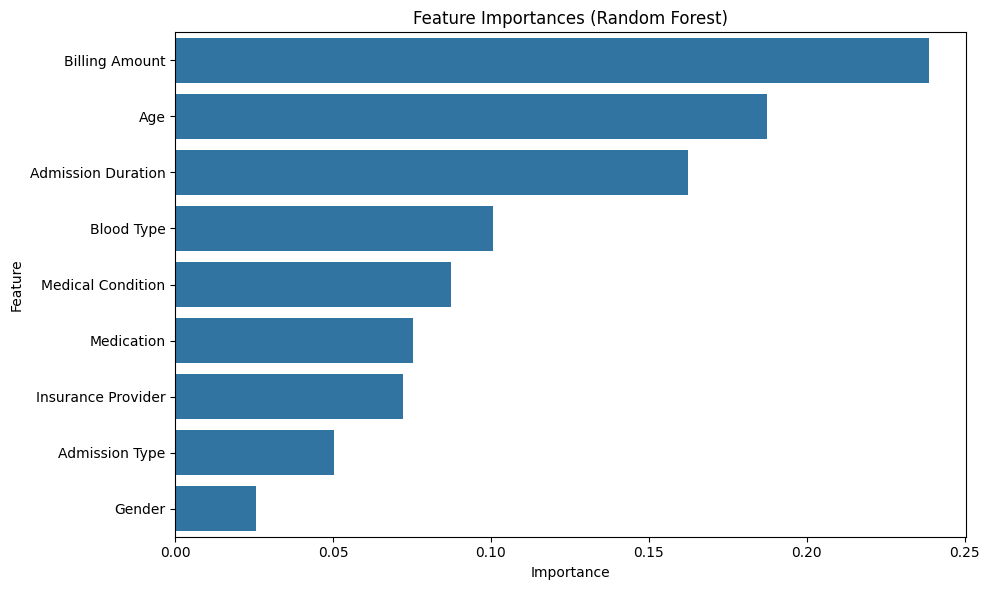

In [59]:
# Feature Importance

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [60]:
# Feature Selection (Select K Best + f_classif)

# Apply SelectKBest with f_classif to select the top 10 features
# Fit it on the training data and transform both X_train and X_test
# Then train a RandomForestClassifier using only the selected features
# Finally, print classification_report and accuracy score

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Train model on selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_selected))

Selected Features: ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication', 'Admission Duration']
Accuracy: 0.3272701024974737
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.34      2376
           1       0.32      0.32      0.32      2267
           2       0.32      0.31      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927



In [61]:
# RFE (Recursive Feature Elimination)

# Apply Recursive Feature Elimination (RFE) using RandomForestClassifier
# Select the top 10 features and evaluate model performance

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use Random Forest as the estimator
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected Features with RFE :", selected_features_rfe.tolist())

# Train model on selected features
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))
print("Classification Report:\n", classification_report(y_test, y_pred_rfe))

Selected Features with RFE : ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication', 'Admission Duration']
Accuracy: 0.3272701024974737
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.34      2376
           1       0.32      0.32      0.32      2267
           2       0.32      0.31      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927



In [62]:
# Varsayım: select_kbest_features veya rfe_selected_features listesi elinizde var
selected_features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
                     'Billing Amount', 'Admission Type', 'Medication', 'Admission Duration']  # Örnek: RFE çıktısı

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Aynı modelleri yeniden tanımlayalım
models = {
    "Logistic Regression (FS)": LogisticRegression(max_iter=1000),
    "Random Forest (FS)": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost (FS)": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM (FS)": SVC(probability=True)
}

# Sonuçları tutacağımız yer
results_fs = {}

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    results_fs[name] = {
        "accuracy": acc,
        "report": report,
        "confusion_matrix": matrix
    }

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(matrix)



Logistic Regression (FS)
Accuracy: 0.3370867619460084
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.26      0.30      2376
           1       0.33      0.37      0.35      2267
           2       0.34      0.38      0.36      2284

    accuracy                           0.34      6927
   macro avg       0.34      0.34      0.34      6927
weighted avg       0.34      0.34      0.33      6927

Confusion Matrix:
[[622 882 872]
 [567 835 865]
 [592 814 878]]

Random Forest (FS)
Accuracy: 0.3272701024974737
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.35      0.34      2376
           1       0.32      0.32      0.32      2267
           2       0.32      0.31      0.32      2284

    accuracy                           0.33      6927
   macro avg       0.33      0.33      0.33      6927
weighted avg       0.33      0.33      0.33      6927

Confusion Matrix:
[[827 